# What I need from you

Congratulations! You probably just opened the most interesting Jupyter Notebook you have ever read.

This Notebook is the result of many hours of hard work. 
And, I need something in return. From you. 

<video src="videos/Minions.mp4" width="280" height="157.5" type="video/mp4" controls>
Your browser does not support the video tag
</video> 
 [d] 

I created this Notebook as part of my bachelor thesis project. An evaluation of this Notebook is part of the thesis. This is why I need you to fill out a questionaire. It will take you about **15 Minutes** to answer all the questions. Your answers can be in English or in German. 

<img src="figures/phone1.jpg" width="500"  alt="If 115 Students read this Notebook, I would need each one of them to fill out my questionaire at least 7.429 times in order to get significant results...">

Please fill out the form before the \<date\>. You can find the questionaire through this link: ...

Thank you very much for your help! I hope the material presented here will help you deepening your understanding of performance in parallel programming.

In [ ]:
%run topsecret/test1.ipynb

# Introduction

Why are you looking at this notebook right now? I assume it is because you are learning about parallel programming and want to know all about it. But why is that so? Why are you bothering about learning the skill of parallel programming?

<img src="figures/happyman.jpg" width="400"  alt="I always wanted to be able to say 'I once too took a course in parallel programming'...">

Well, probably you are aware of the importance of creating code with good performance, and you hope that parallel programming will help you with this. According to [[a]](#a) the main reason why we do parallel programming is to increase performance.

But what is performance ? And to what extend can parallel programming help us increase performance ?

When learning about parallel programming it is crucial to understand what performance is and how we can increase and measure it. 

In this Notebook you will learn about:

- Performance
- [Speed up](#speedup)
- Efficiency
- Overheads
- Scalability
- Amdahl's Law
- Gustafson's Law

This notebook is not a more complicated version of a textbook, but a tool for interactive learning instead. You can write and execute your own code in code cells, and adjust the values of parameters I have defined in my code. You will not only learn about different laws of performance but will also be able to test the validity of these laws yourself. There are a number of benchmarks for this purpose, that you can find in the home-folder of this notebook. Of course you can also write your own serial and parallel programs and test their performance within this notebook. 

Should you have any suggestions of how this notebook could be extended, you can either write me an email and pray for a reply, or simply do it yourself.

Have fun!!!

# Why Parallel Programming ?

With the use of parallel programming we can not only speed up our programs, but we can also use the increased performance to reduce power consumption [[b]](#b):

In this notebook we will not analyze the improvement of performance with regards to power consumption. Nevertheless, I recommend watching the following video by Tim Mattson [[c]](#c). He will talk about why we need parallel programming, and how parallel programming is influencing not only speed but also power consumption.

**Video about power and performance**

<video src="videos/Performance.mp4" width="560" height="315" type="video/mp4" controls>
Your browser does not support the video tag
</video>

What did we learn from Tim Mattson in this video?

We learned that with parallel computing we can either:
1. Execute a program in the same amount of time, but with reduced power consumption
2. or execute a program with the same amount of power consumption, but with reduced execution time

In the following sections we will only evaluate performance with regards to execution time. 

## Speed Up <a class="anchor" id="speedup"></a>

The term 'speed up' is used to describe how much faster a new version of a program runs compared to the old version. This implies that we have 2 different execution times that we compare. In the case of parallel programming, it makes sense to compare 
- the execution time 'without parallelism' 
- the execution time 'with parallelism'

Thus the speed up gives us a measurement for the improvement in speed that was achieved by applying parallelism to a program. 

We use the following formula to calculate speed up [[e]](#e):

**Speed up = $\frac{t_{serial}}{t_{parallel}}$**

> $t_{serial}$ = execution time of the serial program, i.e. the program that does not use parallelism
> <br>$t_{parallel}$ = execution time of the parallelized program 

**Question:**
> Assume we have a serial program, that has an execution time of 54 seconds. Now we apply parallelism to our program. When we measure the execution time again, it is 27 seconds. 

> What speed up did we achieve ? 

In [2]:
%run topsecret/test2.ipynb

My answer:


 2



That's right!
Because 54/27=2 we have a speed up of two. This means, that the parallel version of the programm runs two times as fast than the serial one.


<br><br>
<img src='figures/race3.jpg' width='600' art='picture to illustrate speed up'>

As you can see, calculating the speed up is pretty straight forward. There are, however, two questions you need to ask yourself:
1. How should you measure the execution time ?
2. For a given problem, which serial problem solution should you use to measure $t_{serial}$ ?

## Measuring Execution Time 

In Jupyter Notebooks we can use the magic command `%%time` to measure the execution time of a code cell. Let's look at this example (the Code is in Python):

In [2]:
%%time
a = 2
while a<100:
    a *= 5

CPU times: user 1e+03 ns, sys: 2 µs, total: 3 µs
Wall time: 7.87 µs


As a result we get CPU time and Wall time. Do you know the difference? 

`CPU time` measures the total time during which the CPU was busy executing our code, including time spent in library functions. The `wall time` on the other hand also measures the time, during which our program was idle. Wall time measures 'the time that has elapsed between the start and finish of execution of the code' [[a]](#a).

**Question:** Which one do you think you need to measure, if you want to evaluate the performance of your parallel program?

In [5]:
%run topsecret/test3.ipynb

Write 'CPU Time' or 'Wall Time':


 sda


You did't type a valid answer. Write 'CPU Time' or 'Wall Time'.


**Example:** 
"For example, in a distributed-memory program, a process that calls a receive function may have to wait for the sending process to execute the matching send, and the operating system might put the receiving process to sleep while it waits. This idle time wouldn't be counted as CPU time, since no function that's been called by the process is active. However, it should count in our evaluation of the overall run-time, since it may be a real cost in our program. If each time the program is run, the process has to wait, ignoring the time it spends waiting would give a misleading picture of the actual run-time of the program " [[a]](#a).

**Challenge:** Run the code cell above (the one starting with %%time) multiple times. What do you observe ?

You probably noticed that the wall time and CPU time differ each time you run the code. Since many other things are happening on the system while the code is executed, the exact values for CPU and wall time will differ each time we run the code. 

The following code will give you a graphical illustration of this effect. Note, that in the code below we measure the wall time without the help of the `%%time` magic command. This allow us to save the result of one single measurement multiple times, which we can then plot into a histogram. 

**Hint:** You can replace my code within the commented section with your own code if you want to graphically display the variance in wall time measurements. Should your code not be in Python, then you can make an executable of it instead, place the file in the same folder you have this notebook at, and replace my code with <br>`! ./nameOfYourBinary`. 

Text(0.5, 0, 'micro seconds')

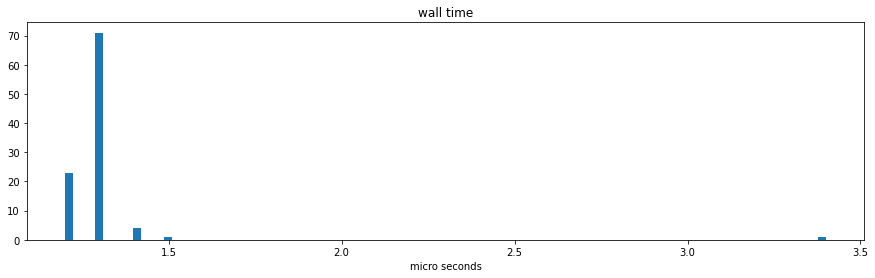

In [1]:
import timeit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

seconds = 1
miliSeconds = 1e3
microSeconds = 1e6
nanoSeconds = 1e9

#start of constants you might want to adjust
timeUnit = microSeconds #determines the time Unit on the x axis of the histogramm
label = 'micro seconds' #this should be the same as the chosen timeUnit 
iterations = 100 #amount of measurements
binsInHistogramm = 100 #amount of containers in the Histogramm
#end of constants you might want to adjust

times = np.zeros(iterations) 

for x in range(iterations):
    time1 = timeit.default_timer()

#start of the code you want to measure execution time on'''
    a = 2
    while a<100:
        a *= 5
#end of the code you want to measure execution time on'''

    time2 = timeit.default_timer()
    times[x]=(time2-time1)*timeUnit

#display histogramm
fig,ax = plt.subplots(figsize=(15,4))
ax.hist(times, bins=binsInHistogramm)
ax.set_title('wall time')
ax.set_xlabel(label)

Each time you rerun the code, the histogram will look different. However, probably you notice one single value at the very right, each time you run the code. This makes it difficult to interpret the histogram values. 

**Question:** Do you think this is just random? Or could there be a good reason for this behavior?

To answer this question, let's look at the first 20 values of our measurements:

In [2]:
if np.size(times)>=20:
    print(times[:20])
else: print(times)

[3.40000042 1.50000051 1.29999898 1.29999898 1.30000262 1.29999898
 1.19999822 1.29999898 1.29999898 1.19999822 1.29999898 1.20000186
 1.30000262 1.30000262 1.20000186 1.29999898 1.29999898 1.29999898
 1.29999898 1.20000186]


Probably the first value is much higher than the following ones. This makes sense, because the first time we run the code data has to be first loaded into the cache. 

Let's discard the first measurement and look at our histogram again:

Text(0.5, 0, 'micro seconds')

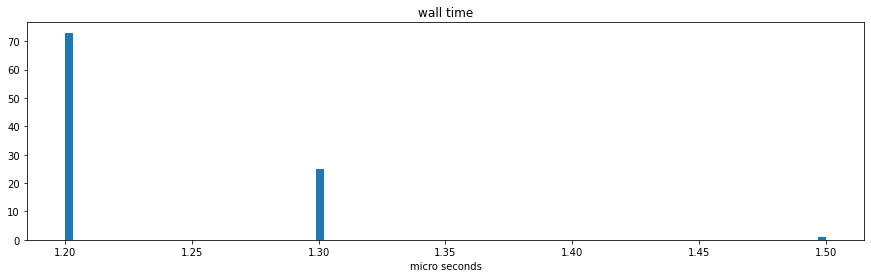

In [5]:
seconds = 1
miliSeconds = 1000
microSeconds = 1000000
nanoSeconds = 1000000000

#start of constants you might want to adjust
timeUnit = microSeconds #determines the time Unit on the x axis of the histogramm
label = 'micro seconds' #this should be the same as the chosen timeUnit 
iterations = 100 #amount of measurements
binsInHistogramm = 100 #amount of containers in the Histogramm
#end of constants you might want to adjust

times = np.zeros(iterations) 

for x in range(iterations):
    time1 = timeit.default_timer()

#start of the code you want to measure execution time on'''
    a = 2
    while a<100:
        a *= 5
#end of the code you want to measure execution time on'''

    time2 = timeit.default_timer()
    times[x]=(time2-time1)*timeUnit

#display histogramm
fig,ax = plt.subplots(figsize=(15,4))
ax.hist(times[1:], bins=binsInHistogramm)
ax.set_title('wall time')
ax.set_xlabel(label)

This histogram looks much better for analysis. 

**Question**: Let's say you want to give one single value for the speed of your program/code section. Which value would you choose? The smallest? The biggest? An average? Would you include very large/small values when calculating the average? 

In [7]:
%run topsecret/test4.ipynb

Which value would you choose? 

Type 'smallest','largest' or 'average': 


 smallest



Very Good!!!
According to Peter Pachecco[a] this is correct. Think about it this way: 
You have different values for the exectution time because each time you run the code, different amount of background work is happening on your system. The 'real' execution time is the one, when no background work is happening at all. So the smaller the exectuion time you measured is, the closer you are to the 'real' execution time. Therefore it makes most sense, to choose the smallest value.




What about the number of iterations? How many times should you measure the wall time on your code, to avoid random noise?

In [8]:
%run topsecret/test5.ipynb

How many iterations would you perform? 

Type a positive integer:



 10


If you just need an aproximate estimate, that will do the job. For a more exact result you probably want to increase the number of iterations.


<br>Let's try a few `number of iterations` and plot the results. For iteration number x we measure the wall time x times, and save the smallest measurement.

**Hint:** You could replace my code within the commented section with your own code.

In [6]:
iterations = [10,100,1000,10000,100000,1000000,10000000]
results = []

for i in iterations:
    result = np.zeros(i)
    for x in range(i):
        time1 = timeit.default_timer()

    #start of the code you want to measure execution time on'''
        a = 2
        while a<100:
            a *= 5
    #end of the code you want to measure execution time on'''

        time2 = timeit.default_timer()
        result[x]=(time2-time1)*1000000 #micro-seconds
    results.append(result.min())

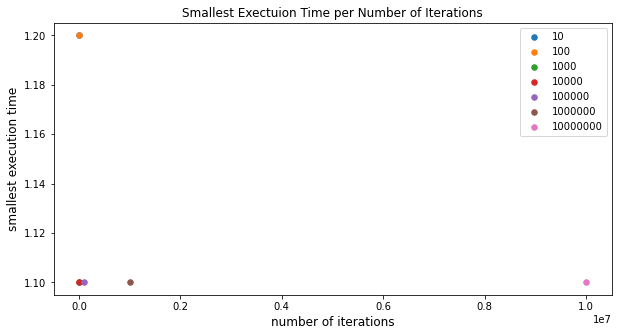

In [7]:
#plot results
fig,ax = plt.subplots(figsize=(10,5)) 
for i in range(len(iterations)):
    ax.scatter(iterations[i], results[i], s=30, label=iterations[i])
ax.set_xlabel('number of iterations', fontsize=12)
ax.set_ylabel('smallest execution time', fontsize=12)
ax.set_title('Smallest Exectuion Time per Number of Iterations')
ax.legend()

The more often you run the code, the more likely you will get a measurement during which the system is not very busy doing other things. As we can see in the plot above, whether you run the code 100 times or 100'000 times can make a big difference. At some point though, the benefit you get from further increasing the number of iterations will become insignificant. When exactly that point is reached depends on: 
- the system
- the background work happening on the system
- the code 

When I run the code above on my system, it looks like after 1 million iterations there is no significant improvement for the minimal execution time. The python module timeit by default also makes 1 million measurements [[e]](#e) [[g]](#g), so this seems to be a good standard practice. For code that is more time consuming you might have to adjust the number of iterations for practical reasons.

<img src='figures/thinking3.jpg' width='400' art='"I could measure the execution time of my serial programm while doing a lot of things in the background. Then when I measure the execution time of my parallel programm, I could minimize the work happening in the background. This could significantly increase my speed-up..."'>

When you want to compare the execution times of different programs (such as a serial and a parallel version) it is obviously necessary, that you measure both execution times on the same system and with similar amount of background work happening on the system. There are multiple ways of how one could influence the measurements and thus distort the calculations of speed up. If you are interested in this topic, I recommend you read the following article "Misleading Performance Reporting in the Supercomputing Field" by David H. Bailey [[f]](#f).

You might have noticed, that the wall time that we measured in the beginning with the magic command `%%time` differs from the time we measured manually with the use of `timeit.default_timer()`. 

There are many different ways of measuring the wall time, and each methods will give slightly different results. The explanation for this is `overhead`. We will talk more about overhead later. Some functions will also by default make multiple measurements of the execution time, and output the acumulated time of all repeats. As long as you are consistent with the method you use for measuring time, it doesn't matter so much which one you choose.

**Timeit Magic Command:** The probably most used method to measure execution time in Jupyter Notebooks is with the built-in magic command `timeit`. You might want to play around with the following options [[h]](#f):

- -o allows you to save the `TimeitResult` object. This also gives you the chance to access some interesting attributes of the TimeitResult object 
- -q silences the output
- -r sets the number of repeats
- -n sets the number of loops for each repeat

Maybe you feel confused about the difference between repeats and loops (I was). Just think of loops as 'repeats during each repeat'. In each repeat the code is executed n times (n=number set for loops), and the accumluated time measurement value of all loop runs is saved for every repeat. When you call the attribute `all_runs` you get the accumulated loop times for each 'repeat'. If you want to get the smallest non-accumulated time that was measured in all individual runs, you can use the attribute `best`.

**Example:** To give an example, we are going to run a sorting program written in c, and measure the total execution time with `%timeit`. The program is sorting an array of 1 million random numbers with the quicksort algorithm. We pass the length of the array to be sorted as an argument, and the option `>/dev/null` silences the output of the program in the terminal. 

In [1]:
time = %timeit -o -n 3 -r 9 -q ! ./programms/quicksort/par.o 100 >/dev/null

**Question:** How many times did we run the program?

In [7]:
%run ./topsecret/test6.ipynb

Type a number:


 seventy



Sorry, that is not correct. The option n tells us how many times the code is run during each repeat. The option r tells us how many repeats we have. Try again...


**Question:** Out of all these program runs, what is the value of the fastest run we measured? What code do you have to run to find out?

In [ ]:
%run ./topsecret/test7.ipynb

Type the code you would run, to find out the smallest execution time?


## Which code should be chosen to calculate $t_{serial}$ ?:
Let's say, we want to use parallel programming to sort a very long array of integer numbers. The problem of 'sorting integers' can be solved with many different algorithms (quicksort, bubblesort, heapsort, mergesort, selectionsort, ...).

In [10]:
! ls

Performanz.ipynb  figures  programms  topsecret  videos


In [17]:
time = %timeit -o -n 1 -r 100 -q ! ./programms/quicksort/par.o 10000 >/dev/null

# References



[a] An introduction to parallel prgoramming. Peter Pachecco 2011.<a class="anchor" id="a"></a>

[b] Introduction to Parallel Computing. From Algorithms to Programming on State-of-the-Art Platforms (2018) page 11? <a class="anchor" id="b"></a>

[c] Time Mattson. Youtube Video "Introduction to OpenMP: 02 part 1 Module 1"  https://youtu.be/cMWGeJyrc9w <a class="anchor" id="c"></a>

[d] Depicable Me. Youtube Video. "Minions - WHAT ?!" https://www.youtube.com/watch?v=MfylJy_nMbM <a class="anchor" id="d"></a>

[e] Python Cookbook <a class="anchor" id="e"></a>

[f] Misleading Performance Reporting in the Supercomputing Field, David H. Bailey <a class="anchor" id="f"></a>

[g] Python Documentation. Timeit Module. https://docs.python.org/3/library/timeit.html <a class="anchor" id="g"></a>

[h] Documentation about magic commands. https://ipython.readthedocs.io/en/stable/interactive/magics.html <a class="anchor" id="h"></a>